In [59]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import matplotlib
import json

In [3]:
base_url = "https://explorerl2new-xps-l3-sepolia-arbitrum-anytru-yk5h2umn72.t.conduit.xyz/api/v2/addresses/0x32B5ae10fEFA3a89BD4007EF44c2f1870fC3e0A8/transactions"

In [4]:
# set first block param
block_number = 149106

In [6]:
# check to see if call is paging correctly
def fetch_page(url, params):
    response = requests.get(url, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch page {params['index']}: Status code {response.status_code}")
        return None

# Fetch the first page
params = {'block_number': block_number, 'index': 1, 'items_count': 50}
first_page = fetch_page(base_url, params)
params = first_page['next_page_params']
# print(first_page)

# Fetching the second page
second_page = fetch_page(base_url, params)
# print(second_page)

In [7]:
# testing the above
all_data = []
all_data.extend(first_page['items'])
all_data.extend(second_page['items'])

df_test = pd.DataFrame(all_data)

# check if the unique counts match total counts
print(len(df_test))
print(len(df_test['hash'].unique()))

100
100


In [8]:
# Loop through pages and store results
all_data = []
page_number = 1
params = {'block_number': block_number, 'index': 1, 'items_count': 50}
while True:
    print(params)
    page_data = fetch_page(base_url, params)
    if page_data['next_page_params']:
        all_data.extend(page_data['items'])
        page_number += 1
        params = page_data['next_page_params']
    else:
        break

{'block_number': 149106, 'index': 1, 'items_count': 50}
{'block_number': 149056, 'index': 1, 'items_count': 100}
{'block_number': 149016, 'index': 1, 'items_count': 150}
{'block_number': 148977, 'index': 2, 'items_count': 200}
{'block_number': 148944, 'index': 1, 'items_count': 250}
{'block_number': 148914, 'index': 1, 'items_count': 300}
{'block_number': 148882, 'index': 1, 'items_count': 350}
{'block_number': 148847, 'index': 1, 'items_count': 400}
{'block_number': 148811, 'index': 2, 'items_count': 450}
{'block_number': 148776, 'index': 3, 'items_count': 500}
{'block_number': 148741, 'index': 3, 'items_count': 550}
{'block_number': 148706, 'index': 3, 'items_count': 600}
{'block_number': 148671, 'index': 3, 'items_count': 650}
{'block_number': 148636, 'index': 3, 'items_count': 700}
{'block_number': 148601, 'index': 3, 'items_count': 750}
{'block_number': 148564, 'index': 1, 'items_count': 800}
{'block_number': 148530, 'index': 1, 'items_count': 850}
{'block_number': 148495, 'index'

KeyboardInterrupt: 

In [9]:
# Convert to DataFrame
df = pd.DataFrame(all_data)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188650 entries, 0 to 188649
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   timestamp                  188650 non-null  object
 1   fee                        188650 non-null  object
 2   gas_limit                  188650 non-null  object
 3   block                      188650 non-null  int64 
 4   status                     188650 non-null  object
 5   method                     188650 non-null  object
 6   confirmations              188650 non-null  int64 
 7   type                       188650 non-null  int64 
 8   exchange_rate              188650 non-null  object
 9   to                         188650 non-null  object
 10  tx_burnt_fee               188650 non-null  object
 11  max_fee_per_gas            188650 non-null  object
 12  result                     188650 non-null  object
 13  hash                       188650 non-null  

In [21]:
df.head()

,timestamp,fee,gas_limit,block,status,method,confirmations,type,exchange_rate,to,...,actions,decoded_input,token_transfers_overflow,raw_input,value,max_priority_fee_per_gas,revert_reason,confirmation_duration,tx_tag,tx_fee_wei
0,2023-12-21T11:16:00.000000Z,"{'type': 'actual', 'value': '357250000000'}",37775,149105,ok,0x9f1c82bd,4,2,2187.93,{'hash': '0x32B5ae10fEFA3a89BD4007EF44c2f1870f...,...,[],None,None,0x9f1c82bd1d65dfba41982ecd24caec35538fb467b0c9...,0,0,None,"[0, 333.0]",None,357250000000
1,2023-12-21T11:15:58.000000Z,"{'type': 'actual', 'value': '357250000000'}",37775,149104,ok,0x9f1c82bd,5,2,2187.93,{'hash': '0x32B5ae10fEFA3a89BD4007EF44c2f1870f...,...,[],None,None,0x9f1c82bd1d65dfba41982ecd24caec35538fb467b0c9...,0,0,None,"[0, 333.0]",None,357250000000
2,2023-12-21T11:15:56.000000Z,"{'type': 'actual', 'value': '357250000000'}",37775,149103,ok,0x9f1c82bd,6,2,2187.93,{'hash': '0x32B5ae10fEFA3a89BD4007EF44c2f1870f...,...,[],None,None,0x9f1c82bd1d65dfba41982ecd24caec35538fb467b0c9...,0,0,None,"[0, 333.0]",None,357250000000
3,2023-12-21T11:15:54.000000Z,"{'type': 'actual', 'value': '357250000000'}",37775,149102,ok,0x9f1c82bd,7,2,2187.93,{'hash': '0x32B5ae10fEFA3a89BD4007EF44c2f1870f...,...,[],None,None,0x9f1c82bd1d65dfba41982ecd24caec35538fb467b0c9...,0,0,None,"[0, 333.0]",None,357250000000
4,2023-12-21T11:15:54.000000Z,"{'type': 'actual', 'value': '357250000000'}",37775,149101,ok,0x9f1c82bd,8,2,2187.93,{'hash': '0x32B5ae10fEFA3a89BD4007EF44c2f1870f...,...,[],None,None,0x9f1c82bd1d65dfba41982ecd24caec35538fb467b0c9...,0,0,None,"[0, 333.0]",None,357250000000


In [10]:
# Function to extract a value from the dictionary
def extract_value_from_dict(row, key):
    return row.get(key, None)  # Returns None if key is not found

# Apply the function to each row in the 'dict_column'
df['tx_fee_wei'] = df['fee'].apply(extract_value_from_dict, args=('value',))
df['from_address'] = df['from'].apply(extract_value_from_dict, args=('hash',))

# keep only necessary columns
df_keep = df[['timestamp','block','status','exchange_rate','hash','gas_price','from_address','gas_used','tx_fee_wei']]

# Convert the 'wei_amount' column to numeric
df_keep.loc[:, 'tx_fee_wei'] = pd.to_numeric(df_keep.loc[:, 'tx_fee_wei'], errors='coerce')

# Conversion function
def wei_to_ether(wei_amount):
    return wei_amount / 10**18

# # Apply the conversion
df_keep['tx_fee_eth'] = df_keep['tx_fee_wei'].apply(wei_to_ether)

# # Convert the 'eth amount' and eth/usd column to numeric
df_keep.loc[:, 'tx_fee_eth'] = pd.to_numeric(df_keep.loc[:,'tx_fee_eth'], errors='coerce')
df_keep.loc[:,'exchange_rate'] = pd.to_numeric(df_keep.loc[:,'exchange_rate'], errors='coerce')

# # get usd
df_keep['tx_fee_usd'] = df_keep['tx_fee_eth'] * df_keep['exchange_rate']

/var/folders/cj/nk4m813d3qn1b3s83hm41h5w0000gn/T/ipykernel_52188/1101120946.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_keep['tx_fee_eth'] = df_keep['tx_fee_wei'].apply(wei_to_ether)
/var/folders/cj/nk4m813d3qn1b3s83hm41h5w0000gn/T/ipykernel_52188/1101120946.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_keep['tx_fee_usd'] = df_keep['tx_fee_eth'] * df_keep['exchange_rate']


In [108]:
# store the data locally as csv
df_keep.to_csv('/Users/trevorjacka/Documents/XMTP/xps_local/orbit_l3_sample_output.csv', index=False)

In [11]:
print(df_keep.info())

# check for unique values
print(len(df_keep))
print(len(df_keep['hash'].unique()))

df_keep.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188650 entries, 0 to 188649
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   timestamp      188650 non-null  object 
 1   block          188650 non-null  int64  
 2   status         188650 non-null  object 
 3   exchange_rate  188650 non-null  object 
 4   hash           188650 non-null  object 
 5   gas_price      188650 non-null  object 
 6   from_address   188650 non-null  object 
 7   gas_used       188650 non-null  object 
 8   tx_fee_wei     188650 non-null  object 
 9   tx_fee_eth     188650 non-null  float64
 10  tx_fee_usd     188650 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 15.8+ MB
None
188650
188650


,timestamp,block,status,exchange_rate,hash,gas_price,from_address,gas_used,tx_fee_wei,tx_fee_eth,tx_fee_usd
0,2023-12-21T11:16:00.000000Z,149105,ok,2187.93,0xaa11a3dc753a9833688cf35420966418bcb2393fb976...,10000000,0xBb19D638Dd11A1958f0E0E35E913bb0B601e3235,35725,357250000000,3.572500e-07,0.000782
1,2023-12-21T11:15:58.000000Z,149104,ok,2187.93,0x80b4892e8dcdf72ae88b9f442286fbad40aec7fa83a3...,10000000,0xBb19D638Dd11A1958f0E0E35E913bb0B601e3235,35725,357250000000,3.572500e-07,0.000782
2,2023-12-21T11:15:56.000000Z,149103,ok,2187.93,0xfb56f8aa5721faf45d4a448b164ac1d88e38a36d3056...,10000000,0xBb19D638Dd11A1958f0E0E35E913bb0B601e3235,35725,357250000000,3.572500e-07,0.000782
3,2023-12-21T11:15:54.000000Z,149102,ok,2187.93,0x6db3b7e7bce2000f8aff145b1c5aaa2029f7b3eacc2d...,10000000,0xBb19D638Dd11A1958f0E0E35E913bb0B601e3235,35725,357250000000,3.572500e-07,0.000782
4,2023-12-21T11:15:54.000000Z,149101,ok,2187.93,0x5db4916587781e61aaaa04cdbb0e53a2a5b6ddd7971e...,10000000,0x64F7b01f9ba63F5E4F10461f371F31b7E23590b5,35725,357250000000,3.572500e-07,0.000782


In [12]:
# Sort the DataFrame by the 'timestamp' column in descending order
df_sorted = df_keep.sort_values(by='timestamp', ascending=False)
df_sorted['time_stamp_formatted'] = pd.to_datetime(df_sorted['timestamp'])

In [13]:
# what is the average tx fee
print(f"avg tx fee usd: {df_keep['tx_fee_usd'].mean():.10f}")
# print(df['tx_fee_usd'].std())
print(f"stddev tx fee usd: {df_keep['tx_fee_usd'].std():.10f}")

print(f"tx sample size: {len(df_keep)}")

avg tx fee usd: 0.0006614882
stddev tx fee usd: 0.0001334109
tx sample size: 188650


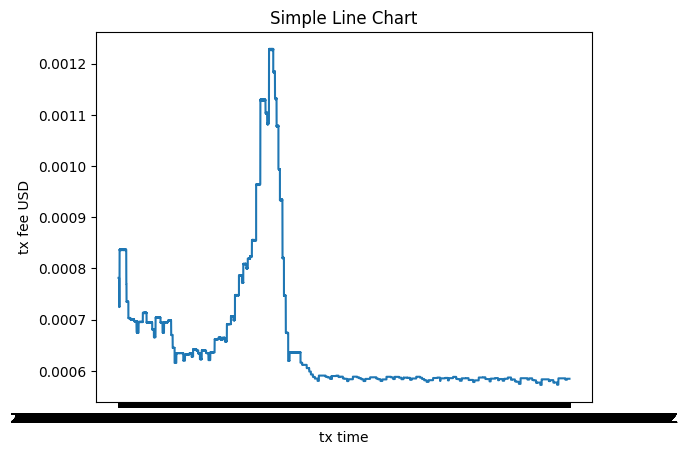

In [20]:
# plot tx fees usd
plt.plot(df_sorted['timestamp'], df_sorted['tx_fee_usd'])

# Add titles and labels
plt.title("Simple Line Chart")
plt.ylabel("tx fee USD")
plt.xlabel("tx time")

# Show the plot
plt.show()

In [36]:
# time between txs for sample account
df_sorted_1e3235 = df_sorted[df_sorted['from_address']=='0xBb19D638Dd11A1958f0E0E35E913bb0B601e3235']
df_sorted_1e3235 = df_sorted_1e3235.sort_values(by='timestamp', ascending=False)
df_sorted_1e3235['time_deltas'] = df_sorted_1e3235['time_stamp_formatted'].diff()
df_sorted_1e3235['time_deltas_seconds'] = df_sorted_1e3235['time_deltas'].dt.total_seconds()

print(f"avg time delta (seconds) for account 0x..1e3235: {df_sorted_1e3235['time_deltas_seconds'].mean():.4f}")
print(f"min time delta (seconds) for account 0x..1e3235: {df_sorted_1e3235['time_deltas_seconds'].max():.4f}")
print(f"max time delta (seconds) for account 0x..1e3235: {df_sorted_1e3235['time_deltas_seconds'].min():.4f}")

avg time delta (seconds) for account 0x..1e3235: -2.0143
min time delta (seconds) for account 0x..1e3235: -1.0000
max time delta (seconds) for account 0x..1e3235: -905.0000


In [26]:
# calculate seconds between txs by account
df_sorted_by_address = df_sorted.sort_values(by=['from_address','timestamp'], ascending=[False,False])
df_sorted_by_address['time_deltas'] = df_sorted_by_address.groupby('from_address')['time_stamp_formatted'].diff()
df_sorted_by_address['time_deltas_seconds'] = df_sorted_by_address['time_deltas'].dt.total_seconds() * -1

In [28]:
# count number of txs with time delta greater than 10 seconds
print(len(df_sorted_by_address[df_sorted_by_address['time_deltas_seconds'] > 10]))
print(len(df_sorted_by_address[df_sorted_by_address['time_deltas_seconds'] > 100]))

144
20


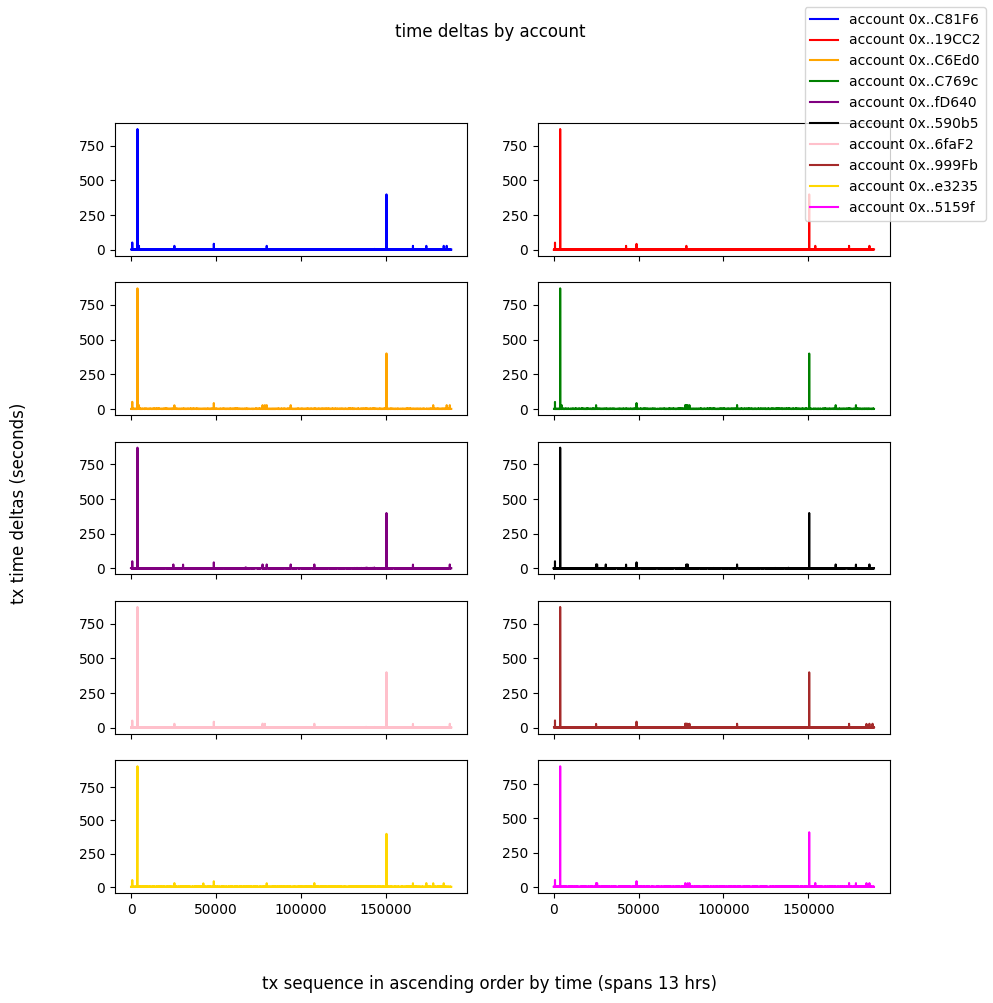

In [70]:
# plot by account
# build the figure and subplots
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7,ax8), (ax9, ax10)) = plt.subplots(5, 2, sharex='col')

# set figure attributes
fig.set_size_inches(10,10)
fig.suptitle("time deltas by account")
fig.supxlabel("tx sequence in ascending order by time (spans 13 hrs)")
fig.supylabel("tx time deltas (seconds)")

# build the data
y_data_1 = df_sorted_by_address['time_deltas_seconds'][df['from_address'] == '0xd96FA162b064553822e765545E3D48a054eC81F6']
y_data_2 = df_sorted_by_address['time_deltas_seconds'][df['from_address'] == '0xeBFc913dFfA597C1200b4c4daDe9D90415019CC2']
y_data_3 = df_sorted_by_address['time_deltas_seconds'][df['from_address'] == '0x194c31cAe1418D5256E8c58e0d08Aee1046C6Ed0']
y_data_4 = df_sorted_by_address['time_deltas_seconds'][df['from_address'] == '0x3128F288b4dD2358B5F1C553c2c3758c1aAC769c']
y_data_5 = df_sorted_by_address['time_deltas_seconds'][df['from_address'] == '0x287f25512abD2e8341Cf2D5247df7CFEb30fD640']
y_data_6 = df_sorted_by_address['time_deltas_seconds'][df['from_address'] == '0x64F7b01f9ba63F5E4F10461f371F31b7E23590b5']
y_data_7 = df_sorted_by_address['time_deltas_seconds'][df['from_address'] == '0x7C11C9B05C45F81e10345785C72360381346faF2']
y_data_8 = df_sorted_by_address['time_deltas_seconds'][df['from_address'] == '0x834D985d81650bd6c3125ba3B5B29fdfF4f999Fb']
y_data_9 = df_sorted_by_address['time_deltas_seconds'][df['from_address'] == '0xBb19D638Dd11A1958f0E0E35E913bb0B601e3235']
y_data_10 = df_sorted_by_address['time_deltas_seconds'][df['from_address'] == '0xBd5DB0998a08af5494CF2D4FF2F661AF6905159f']

# plot each series as separate subplot
ax1.plot(y_data_1, label='account 0x..C81F6', color='blue')
ax2.plot(y_data_2, label='account 0x..19CC2', color='red')
ax3.plot(y_data_3, label='account 0x..C6Ed0', color='orange')
ax4.plot(y_data_4, label='account 0x..C769c', color='green')
ax5.plot(y_data_5, label='account 0x..fD640', color='purple')
ax6.plot(y_data_6, label='account 0x..590b5', color='black')
ax7.plot(y_data_7, label='account 0x..6faF2', color='pink')
ax8.plot(y_data_8, label='account 0x..999Fb', color='brown')
ax9.plot(y_data_9, label='account 0x..e3235', color='gold')
ax10.plot(y_data_10, label='account 0x..5159f', color='magenta')

# set the legend
fig.legend()